## Previsão do preço de casas no estado da Califórnia - EUA

- O objetivo deste projeto, é desenvolver habiliades na construção de um modelo de _Machine Learning_ capaz de realizar predições do preço de casas no estado da Califórnia, nos EUA. O dataset utilizado está disponível para download no [Kaggle](https://www.kaggle.com/). 
- As variáveis disponíveis nesse dataset para a construção do modelo, serão mostradas posteriormente, mas de antemão, aqui vai um breve resumo das mesmas:
    - longitude: longitude
    - latitude: latitude 
    - housing_median_age: idade média da casa
    - total_rooms: número total de cômodos
    - total_bedrooms: número total de quartos
    - population: população
    - households: famílias
    - median_income: renda média
    - ocean_proximity: proximidade do oceano
    - median_house_value: valor médio da casa
- A variável (_target_) que iremos prever, é a _median_house_value_, ou valor médio da casa.
- Será feita uma análise completa, desde a importação das bibliotecas e dos dados, passando pela análise exploratória dos mesmo, trabalhando com todo o pré-processamento dos dados, tratamento de _features_ categóricas, _impute_ de valores faltantes e escalonamento de _features_ numéricas.

## Importando bibliotecas e carregando dados

In [4]:
import pandas as pd
import numpy as np
# importar essas bibliotecas caso for fazer o descompactamento dos dados
#import tarfile 
#import urllib.request
import matplotlib.pyplot as plt
from scipy.stats import randint
from scipy import stats
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#import warnings
#warnings.filterwarnings("ignore")

In [28]:
# Pequeno trecho de código que faz a descompressão dos dados
#def load_housing data():
#    tarball_path = Path("archive/housing.tgz")
#    if not tarball_path.is_file():
#        Path("archive").mkdir(parents=True, exist_ok=True)
#        url = "https://github.com/ageron/data/raw/main/housing.tgz"
#        urllib.request.urlretrieve(url,tarball_path)
#        with tarfile.open(tarball_path) as housing_tarball:
#            housing_tarball.extractall(path='archive')
#    return pd.read_csv(Path("archive/housing/housing.csv"))

#housing = load_housing_data()

In [6]:
housing = pd.read_csv('california_housing.csv')

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Existem 20.640 linhas no dataset, entretanto, a categoria  **total_bedrooms** possui 20.433, isto é, existem 207 dados faltantes nessa coluna.
- Todas as colunas (atributos) são numéricas _float64_, exceto a coluna **ocean_proximity**, que é do tipo _object_
- Se olharmos bem, o atributo ocean_proximity possui caracteristicas de uma variável categórica.

In [104]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- De fato, existem 5 tipos de categorias na coluna ocean_proximity, sendo elas **<1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY** e **ISLAND**

In [105]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Podemos dar uma olhada na estatística descritiva do dataset para ver como os valores estão dispersos, por exemplo, analisando o **desvio padrão** de cada variável.

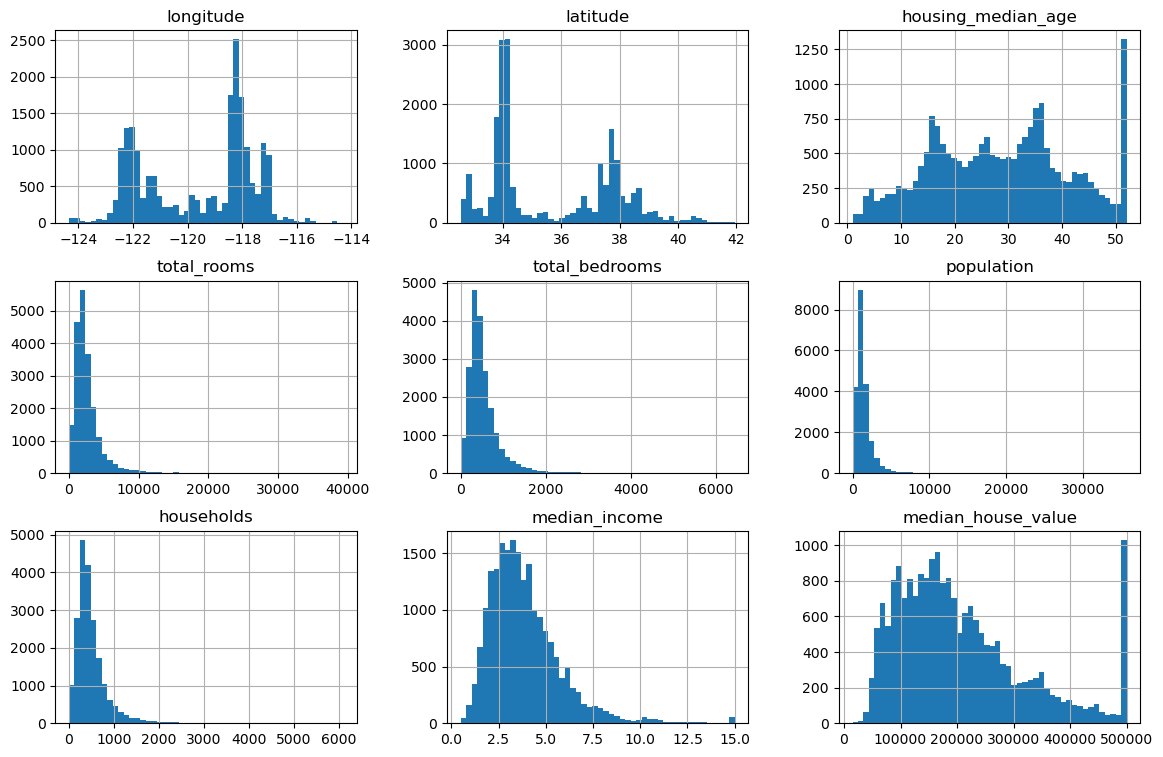

In [106]:
housing.hist(bins=50, figsize=(14,9))
plt.show()

- Uma outra forma de tirarmos alguns _insights_ do dataset, é plotarmos um histograma das variáveis numéricas presentes nesse dataset.
- Um histograma mostra o número de instâncias (eixo vertical) dado uma faixa de valores (eixo horizontal).
- Analisando esses gráficos podemos tira que:
     1. A variável **median_income** não aparenta estar expressa em dolar. 
     2. AS variaveis **housing_median_age** e **median_house_value** possuem um limite. Isso será um problema, pois essa última é a variável target que tentaremos realizar a previsão.
     3. Os atributos possuem diferentes escalas, um tratamento para esse tipo de situação deverá ser realizado posteriormente.
     4. Os histogramas são _skewed right_, isto é eles se extendem muito mais para a direita da média do que para a esquerda. Isso pode tornar um pouco complicado para o algoritmo de machine learning detectar alguns padrões.

## Separando dados de treino e teste

- A biblioteca _scikit_learn_ fornece algumas funções para realizar a divisão dos conjuntos de dados nos subconjuntos de treino e teste.
    1. O primeiro parâmetro dita o tamanho do subconjunto de teste (_test_size_). Nesse ponto podemos também configurar para o tamanho do subconjunto de treino, por exemplo, estabelecendo um _train_size = 0.8_.
    2. O segundo parâmetro _random_state_ permite definir a _seed_ do gerador aleatório. O valor de 42 nesse parâmetro dita que sempre irá gerar o mesmo "embaralhamento" dos índices.

In [107]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [108]:
len(train_set)

16512

In [109]:
len(test_set)

4128

- De antemão, é possível inferir que **median_income** é um atributo muto importante para prever o **median_housing_prices**. É nessecário garantir que os subconjunto de teste seja representativo para as várias categorias de **renda** (income) do dataset. 
- Como o **median_income** é um atributo numérico continuo, precisamos criar um atributo categórico para a renda.
- Se olharmos o último gráfico gerado, é possível observar que os valores de **median_income** estão agrupados entre 1.5 e 6, mas alguns valores vão bem além de 6. 
- É importante ter um número suficiente de instância no seu dataset para cada estrato, se não a estimativa da relevância de um estrato pode ser enviesada. Ou seja, não devemos ter muitos estratos, e cada estratos deve ser grande o suficiente. 
- Na célula abaixo vamos criar um atributo categórico para _income_ (renda) com cinco categorias (rotuladas de 1 até 5), a categoria um 1 vai de 0 até 1.5, categoria 2 de 1.5 até 3 e assim por diante.

In [110]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1,2,3,4,5])

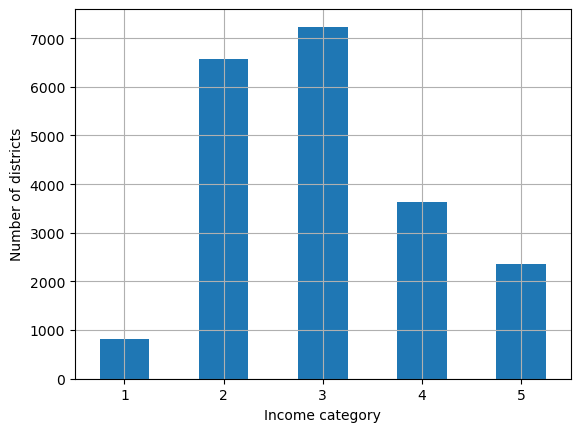

In [111]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

- O método `split()` atua nos indices de treinamento e teste, não nos dados em si.
- A célula abaixo, gera 10 divisões estratificadas diferentes do mesmo dataset

In [112]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [113]:
strat_train_set, strat_test_set = strat_splits[0]

- Um jeito mais rápido de obter uma simples divisão é utilizando a função `train_test_split()` com o argumento `stratify`

In [114]:
strat_train_set, strat_test_set = train_test_split(housing,
                                                  test_size=0.2,
                                                  stratify=housing["income_cat"],
                                                  random_state=42)

- Proporções da categoria **income** no subconjunto de teste.

In [115]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

- Como não iremos utilizar a columa **income_cat** novamente, podemos remove-la.

In [116]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Análise Exploratória dos Dados (Insights)

- Até o momento demos uma pequena olhada nos dados para obter um entendimento geral dos tipos de dados que estamos trabalhando. Agora vamos entrar um pouco mais afundo.
- Primeiramente vamos nos certificar de deixar o subconjunto de teste de lado e explorar apenas o subconjunto de treino.
- Caso o subconjunto de treino seja muito grande, podemos ainda dividir em um _subconjunto de exploração_, obtendo amostras menores do subconjunto de treino. Isso deixará as manipulações mais faceis e mais rápida durante essa etapa.
- No caso desse dataset, o subconjunto de teste é relativamente pequeno, então  podemos trabalhar diretamente com o dataset completo.
- Por isso, como vamos fazer várias transformações no conjunto de treinamento completo, devemos fazer uma cópia para que possamos voltar para ele posteriormente.

In [117]:
housing = strat_train_set.copy()

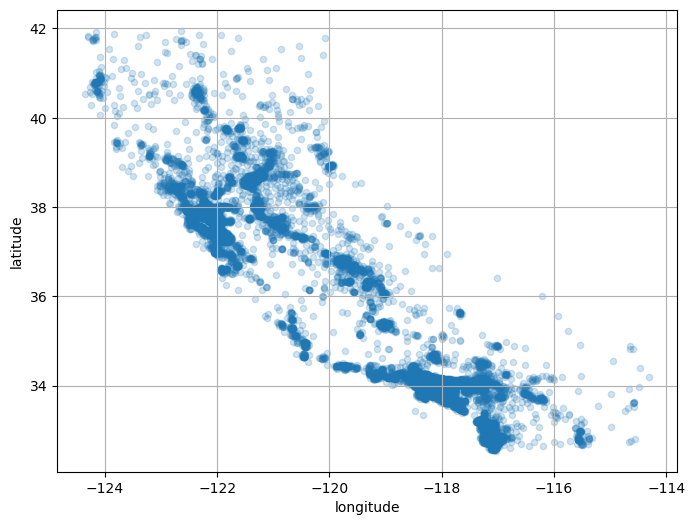

In [118]:
housing.plot(kind='scatter', x='longitude',y='latitude', 
             grid=True,alpha=0.2,figsize=(8,6))
plt.show()

- No gráfico acima, temos informações geográficas (latitude e longitude) dos dados. 
- Utilizando o parâmetro `alpha = 0.2`, conseguimos ter uma ideia melhor da distribuição de densidade desses atributos.

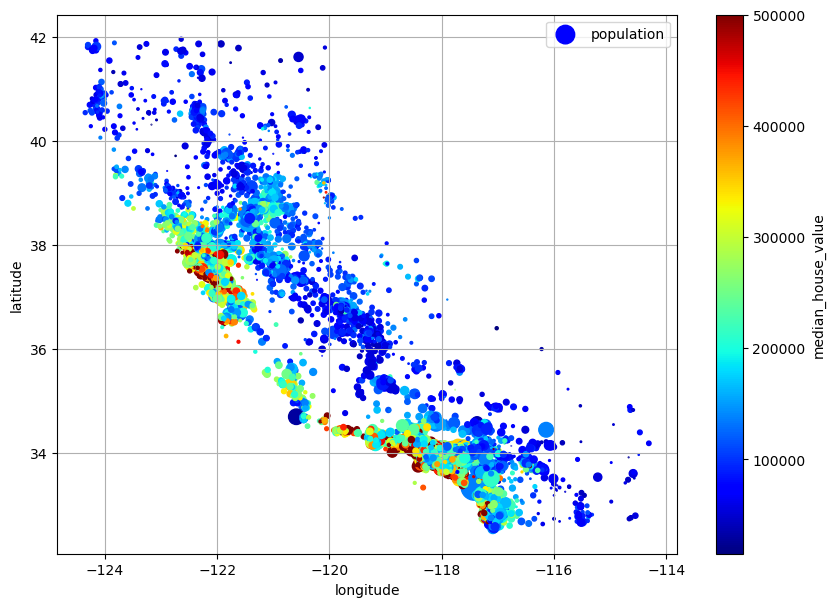

In [119]:
housing.plot(kind='scatter', x='longitude',y='latitude', grid=True,
            s=housing['population']/100, label = 'population',
            c="median_house_value", cmap='jet', colorbar=True,
            legend=True, sharex=False, figsize=(10,7))
plt.show()

- Essa imagem nos diz que o preço das casas (_housing prices_) está muito relacionada com a localização (perto do oceano) e com a densidade de população.
- Um algoritmo de clusterização (_agrupamento_) pode ser útil para detectar esses _clusters_ e adicionar novas _features_ que são medidos de acordo com a proximidade com os centros dos _clusters_.
- O atributo (comumente chamdo de _preditor_) **ocean_proximity** pode ser útil para essa clusterização, embora bem ao norte do estado da California, os preços das casas na região litoral não são muito altos.

### Correlações

- Visto que o dataset não é muito grande, podemos calcular o _Standard Correlation Coefficiente_ (Coeficiente de Correlação), também chamdo de _Pearson's r_ entre cada par de atributos.

In [120]:
corr_matrix = housing.corr()

In [121]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- A célula acima mostra a correlação de cada atributo com o **median_house_value**
- O coeficiente de correlação varia de -1 até 1.
- Quando esse valor é **perto de 1**, significa que existe uma **forte correlação positiva**. No caso acima, o **median_house_value** tende a aumentar quando o **median_income** aumenta.
- Quando o coeficiente se **aproxima de -1**, significa que existe uma **forte correlação negativa**. Podemos ver que os preços possuem uma leve tendência a abaixar quanto mais ao norte do estado.
- Por fim, quando o coeficiente é **perto de 0**, significa que **não existe nenhuma correlação linear entre as variáveis**.

- Outra maneira de verificar a correlação entre os atributos, é utilizar uma função do Pandas chamada `scatter_matrix()`, que nos dá um gráfico de cada atributo numérico pelos outros atributos numéricos. 
- Como temos 11 atributos numéricos, teríamos 11² = 121 gráficos, o que é inviável para caber em uma página.
- Dessa forma, vamos focar apenas nos atributos mais promissores que aparentam ter a maior correlação com o **median_housing_value**

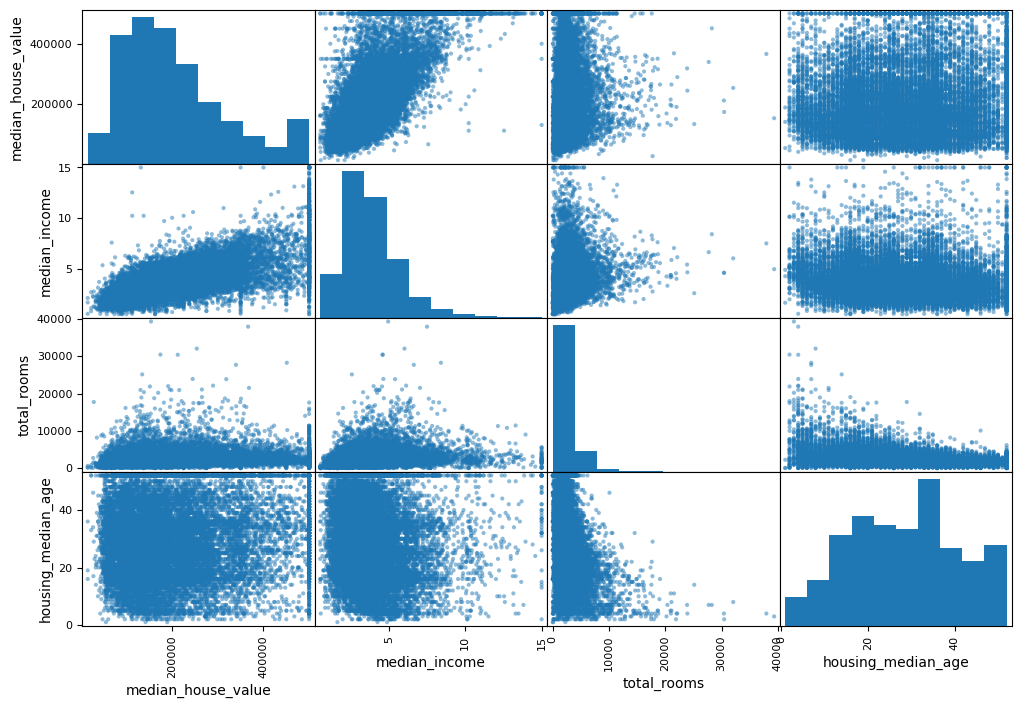

In [122]:
attributes = ['median_house_value', 'median_income','total_rooms',
             'housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

- A diagonal dessa "matriz de _scatter plots_, não é muito útil para nós pois ela nos dá uma variável por ela mesma. Os outros gráficos mostram um histograma de cada atributo 
- Observando essa figura, aparentemente, o atributo mais promissor para prever o **median_house_value** é o **median_income**.
- Vamos dar uma olhada com mais detalhe para esse gráfico.

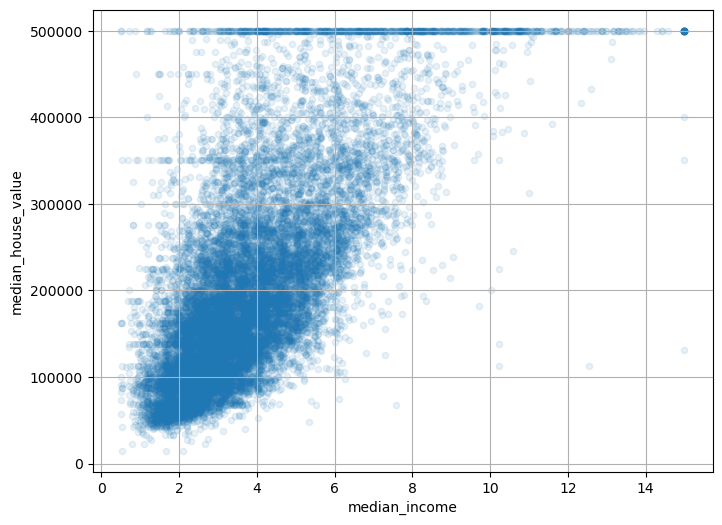

In [123]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',
            alpha=0.1,grid=True, figsize=(8,6))
plt.show()

- A figura acima nos revela coisas importantes. Primeiramente a correlação é de fato forte, podemos ver claramente uma tendencia de crescimento e os pontos não estão tão dispersos.
- Além disso, o preço possui um "teto" e é claramente visível como uma linha horizontal em 500.000.
- Podemos ver também uma linha horizontal perto de 450.000, outra por volta de 350.000 e possívelmente outra em 280.000

- Uma última etapa antes de preparamos os dados para de fato implementar os algoritmos de _Machine Learning_ é testar combinações entre os atributos.
- Por exemplo, o número total de quartos em um distrito (imagino que seja cidade) não é muito útil se não sabemos quantas famílias existe lá. 
- É mais interessante sabermos o número de quartos por família. De forma similar, o número de quartos por si só não é muito útil, e a população por família também parece uma combinação de atributos interessante para darmos uma olhada.
- Dessa forma, vamos criar esses novos atributos conforme a célula abaixo:

In [124]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [125]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

- O novo atributo **bedrooms_ratio** é muito mais correlacionado com o **median_house_value** do que o **total_rooms** or **total_bedrooms**.
- Aparentemente casas com baixo **bedroom/room ratio** tendem a serem mais caras.
- O **number of rooms** por cidade também é muito mais informativo do que o **total number of rooms**.

## Preparação dos dados 

- Primeiramente, vamos reverter para um conjunto de treinamento limpo. Devemos também separar as variáveis preditoras do _target_.

In [126]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Limpeza dos dados

- Alguns algoritmos de Machine Learning não conseguem trabalhar com dados faltantes. Vimos anteriormente que em **total_bedrooms** existem valores faltantes. Temos três opções para resolver isso:
    1. Livrar-se dos distritos correspondentes.
    2. Livrar-se de todo o atributo.
    3. Definir os valures faltantes para algum valor (zéro, media, mediana, etc). Isso é chamado de _Imputation_.

- Nesse ponto, vamos utilizar a terceira opção para completar os dados faltantes para o problema.
- Vamos utilizar uma classe do Scikit-Learn chamada `SimpleImputer`. 
- Instanciamos o _imputer_ especificando que queremos substituir os dados faltantes com a mediana daquele atributo.

In [127]:
imputer = SimpleImputer(strategy="median")

- Como a mediana só pode ser calculada em atributos numéros, devemos criar uma copia dos dados com apenas os atributos numéricos (ou seja, devemos excluir o atributo **ocean_proximity**).

In [128]:
housing_num = housing.select_dtypes(include=[np.number])

- Agora vamos aplicar a instância _imputer_ para os dados de treinamento utilizando o método `fit()`.
- Nesse ponto, o imputer apenas fez os cálculos da mediana dos dados em _housing_num_.

In [129]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

- O _imputer_ calculou a mediana de cada atributo e armazenou o resultado na variável instanciada `statistics_`. Apenas o atributo **total_bedrooms** possui valores faltantes, mas não temos a certeza de que não haverá nenhum valor faltante nos novos dados quer irão entrar no modelo, por isso é mais seguro aplicar o _imputer_ a todos os atributos numéricos.

In [130]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [131]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

- Agora vamos utiliza os valores calculados pelo _imputer_ para transformar o conjunto de treinamento substituindo os valores faltantes com as medianas calculadas.

In [132]:
X = imputer.transform(housing_num)

- Outras formas de realizar o _impute_ em dados faltantes:
    - (strategy="mean")
    - (strategy="most_frequent")
    - (strategy="constant", fill_value=...)
- Esses dois últimos funcionam para dados não-numéricos.

<img src="Tip_imputer.png">

- O Scikit-Learn transforma os dados que entram em suas funções em NumPy arrays, mesmo se eles foram alimentados por um Pandas DataFrame. Dessa forma, $X$ não possui nenhum nome de coluna nem index. Como podemos ver abaixo:

In [133]:
print(X)

[[-1.2146e+02  3.8520e+01  2.9000e+01 ...  2.2370e+03  7.0600e+02
   2.1736e+00]
 [-1.1723e+02  3.3090e+01  7.0000e+00 ...  2.0150e+03  7.6800e+02
   6.3373e+00]
 [-1.1904e+02  3.5370e+01  4.4000e+01 ...  6.6700e+02  3.0000e+02
   2.8750e+00]
 ...
 [-1.2272e+02  3.8440e+01  4.8000e+01 ...  4.5800e+02  1.7200e+02
   3.1797e+00]
 [-1.2270e+02  3.8310e+01  1.4000e+01 ...  1.2080e+03  5.0100e+02
   4.1964e+00]
 [-1.2214e+02  3.9970e+01  2.7000e+01 ...  6.2500e+02  1.9700e+02
   3.1319e+00]]


- Por isso, vamos converter $X$ em um DataFrame e recuperar os nomes das colunas e os indexes de _housing_num_.

In [134]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)

In [135]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


### Lidando com Textos e Variáveis Categóricas

- Nesse problema, temos apenas uma variável do tipo categórica, **ocean_proximity**. vamos dar uma olhada nas instancias

In [136]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN


- Como já foi observado anteriormente, existe um número limitado de valores possíveis, cada um representando uma categoria. Como a maioria dos algoritmos de Machine Learning preferem trabalhar com números, vamos converter essas categorias em números.
- Para isso, vamos utilizar a classe do Scikit-Learn chamada `OrdinalEncoder`.

In [137]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

- Os primeiros oito valores dos valores _codificados_ (encoded) em **housing_cat**:

In [138]:
housing_cat_encoded[:8]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.]])

- Podemos acessar a lista das categorias utilizando a variável instanciada `categories_`. É uma lista contendo um _array_ 1D com as categorias de cada atributo.

In [139]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- Um problema desse tipo de representação é que os algoritmos de Machine Learning, assumem que dois valores próximos são mais similares do que dois valores distantes.
- Isso pode ser fazer sentido em alguns casos (para categorias ordenadas como "ruim", "média", "bom" e "excelente"), mas não é esse o caso para **ocean_proximity** (por exemplo, categorias 0 [<1H OCEAN] e 4 [NEAR OCEAN] são claramente mais similares do que as categorias 0 [<1H OCEAN] e 1 [INLAND].)
- Para contornar essa situação, uma solução comum é criar um atributo binário por categoria: um atributo igual a 1 quando a categoria é "<1H OCEAN" (e 0 caso contrário), outro atributo igual a 1 quando a categoria é "INLAND" (e 0 caso contrário) e assim por diante.
- Essa estratégia é chamada de **_One-Hot Encoding_**, pois apenas um atributo será igual a 1 (HOT), enquanto os outros serão 0 (COLD). Esses novos atributos as vezes são chamados de **atributos _dummy_** ou **Variáveis _dummy_**.
- Scikit-Learn fornece uma classe `OneHotEncoder` para converter valores categóricos em vetores "one-hot".

In [140]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

- Por padrão, a saída do `OneHotEncoder` é uma matriz esparsa ao invés de um NumPy array.

In [141]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

- Uma matriz esparsa é uma representação muito eficiente para matrizes que contém 0 na maioria dos seus elementos. Internamente ela armazena apenas os valores não-nulos e suas posições.
- Quando um atributo categórico possui centenas de milhares de categorias, one-hot encoding resulta em uma matriz muito grande cheia de zeros exceto por apenas um 1 por linha. 
- Nesse caso, uma matriz esparsa é a melhor representação, irá nos salvar muita memória e velocidade de processamento. 
- Podemos trabalhar com uma matriz esparsa de forma semelhante a um vetor 2D, mas temos que converter em um (Dense) Numpy array, utilizando o método `toarray()`.

In [142]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

- De forma alternativa, podemos _setar_ `sparse=False` quando criarmos o `OneHotEncoder`, que nesse caso o método `transform()` irá retornar um vetor regular (dense) do Numpy diretamente.

- Semelhantemente ao método anterior (`OrdinalEncoder`), podemos acessar a lista das categorias utilizando a mesma variável instanciada.

In [143]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- A vantagem do `OneHotEncoder` é que ele lembra quais categorias em que foi treinado. Isso é muito importante porque uma vez que o modelo está em produção, ele deve ser alimentado exatamente com as mesmas _features_ que foram utilizadas no treinamento, nem mais, nem menos. 
- Observe a saída do `cat_encoder` treinado quando fazemos a transformação do mesmo `df_test` (utilizando `transform()` e não `fit_transform()`)

In [144]:
df_test = pd.DataFrame({"ocean_proximity":["INLAND","NEAR BAY"]})

In [145]:
cat_encoder.transform(df_test)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

- Se alimentarmos contendo um DataFrame contendo uma categoria desconhecida, por exemplo <2H OCEAN, ele detectará a categoria desconhecida e irá levantar uma exceção. Se preferir podemos definir o hiperparâmetro `handle_unknown` como "ignore", o que nesse caso irá representar a categoria desconhecida com zeros.

In [147]:
df_test_unknown = pd.DataFrame({"ocean_proximity":["<2H OCEAN","ISLAND"]})
cat_encoder.handle_unknown = 'ignore'
cat_encoder.transform(df_test_unknown)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

-  Quando ajustamos qualquer estimador do Scikit_Learn utilizando um DataFrame, o estimador armazena os nomes das colunas no atributo `feature_names_in_`.
- O pacote (Scikit-Learn) garante que qualquer DataFrame posteriormente alimentado (exemplo: para `transform()` ou `predict()`) possui os mesmo nomes das colunas.
- Os transformadores também fornecem o método `get_feature_names_out()` que vamos utilizar para construir um DataFrame utilizando a saída do transformador.

In [148]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [149]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [113]:
#df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
#                        columns=cat_encoder.get_feature_names_out(),
#                        index=df_test_unknown.index)

### Feature Scaling e Transformação

- Os algoritmos de Machine Learning não performam bem quando os atributos numéricos de entradas possuem escalas muito diferentes.
- No caso desse projeto, para o **total number of rooms** varia de 6 até 39.320, enquanto que o **median income** varia apenas de 0 até 15. 
- Sem nenhum tipo de _scaling_, a maioria dos modelos irão se tornar enviesados de forma a ignorar o **median income** e focar mais em **number of rooms**.

- Existem duas formas mais comuns de deixar todos os atributos na mesma escala: utilizando _min-max scaling_ e _standardization_.
- **Min-max scaling** (também conhecido como normalização) é o mais simples: para cada atributo os valores são alterados e redimensionados para que fiquem em na faixa de 0 até 1. Isso é realizado subtraindo o minimo valor e dividingo pela diferença entre o valor minimo e valor máximo. Scikit-Learn fornece um transformador chamado `MinMaxScaler` para esse propósito. Ele contém um hyperparâmetro `feature_range` que permite mudarmos a faixa de valores se, por alguma razão, não queremos ir de 0 a 1 e sim de -1 até 1.

In [150]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

- **Standardization** é diferente: primeiramente subtrai o valor médio e entnão divide o resultado pelo desvio padrão. Diferentemente do Min-Max Scaling, Standardization não restringe os valores para uma faixa específica. Essa abordagem é muito menos afeta por _outliers_.

In [151]:
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

- Quando a distribuição de uma _feature_ possui _heavy tail_ (isto é, quando os valores longes da média não são exponencialmente raros), ambos min-max scaling e standardization irão "esmagar" a maioria dos valores em um pequeno intervalo. A maioria dos modelos de Machine Learning geralmente não lidam bem com isso.
- Então antes de realizar um _scale feature_, devemos primeiro transforma-lo para encolher a _heavy tail_, e se possível tornar a distribuição aproximadamente simétrica. 

- Uma forma de lidar com  essas features "_heavy-tailed_" constite em realizar um _bucketizing_ nessa feature.
- Isso significa cortar sua distribuição em "_buckets_" aproximadamente iguais e substituir cada valor da feature pelo index do _bucket_ que ele pertence, muito parecido como foi feito anteriormente para ciar a feature `income_cat`. Por exemplo, podemos substituir cada valor pelo seu percentil.
- A criação desses _buckets_ com tamanhos iguais resulta em uma _feature_ com uma distribuição quase uniforme, portanto, não há mais a necessidade de mais _scaling_, ou podemos apenas dividir pelo número de _buckets_ para forçar os valores para uma faixa de 0 a 1.

- Quando uam feature possui uma distribuição multimodal (isto é, com dois ou mais picos, chamados de modos), como é o caso da feature `housing_median_age`, também pode ser útil "_bucketizar_' ela, mas dessa vez tratando os IDs dos _buckets_ como categorias ao inves de valores numéricos. 
- Isso significa que os indices dos _buckets_ devem ser codificados, por exemplo utilizando o `OneHotEncoder` (então geralmente não utilizamos muitos _buckets_).
- Essa abordagem irá permitir que o modelo de regressão aprenda mais facilmente os diferentes padrões para as variadas faixas de valores daquela _feature_. Por exemplo, talvez casas construídas cerca de 35 anos atrás tenham um estilo peculiar que sairam de moda e, portanto, são mais baratas do que a idade sugeriria.

- Outra abordagem para transformar distribuições multimodais é adicionar uma _feature_ para cada um dos modos (pelo menos os principais), representando as semelhanças entre a **housing median age** e aquele modo particular. 
- A medida de similaridade é comumente calculada usando uma **função de base radial** (RBF) ou _Radial Basis Function_, qualquer função que dependa apenas da distância entre o valor de entrada e um ponto fixo.
- A RBF mais utilizada é a RBF Gaussiana, cujo valor de saída decai exponencialmente à medida que o valor de entrada se move para longe do ponto fixo. Por exemplo a similaridade Gaussiana RBF entre **housing age** $x$ e 35 é dada pela equação $exp(-\gamma(x-35)^2$.
- O hiperparâmetro $\gamma$ determina o quão rápido a medidade de similaridade decai conforme $x$ se afasta de 35. Utilizando a função do Scikit-Learn `rbf_kernel()` podemos criar uma nova _feature_ RBF Gaussiana, medindo a semelhança entre a **housing median age** e 35:

In [152]:
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

- Até agora olhamos apenas para as _features_ de entrada, mas os valores do _target_ também precisam ser transformados. Por exemplo, se a distribuição do _target_ possui uma _heavy tail_, seria melhor substituirmos o _target_ pelo seu logaritmo.
- Se fizermos isso, o modelo de regressão irá agora predizer o _log_ do **median house value**, não ela mesma. Então teremos que calcular a exponencial do modelo de predição se queremos os valores da **median house value**. 
- Por sorte, a maioria dos transformadores do Scikit-Learn possuem o método `inverse_tranform()` tornando muito mais fácil realizar a inversão dessas transformações.
- Por exemplo o código abaixo mostra como realizar um _scale_ dos _labels_ utilizando o `StandardScaler` e então treinar um modelo de regressão linear simples nos _labels_ escalonados resultantes e utilizá-los para realizar uma predição em alguns novos dados, de forma que transformamos de volta para o escalonamento original utilizando o método `inverse_transform()`.

In [153]:
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
some_new_data = housing[['median_income']].iloc[:5]

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

- Uma opção mais simples é utilizar o `TransformedTargetRegressor`. Precisamos apenas construi-lo, dando o modelo de regressão e o _label transformer_, então realizar o ajuste nos dados de treinamento utilizando os _labels_ originais não-escalonados. 
- Irá automaticamente usar o _transformer_ para escalonar os _labels_ e treinar o modelo de regressão nos _labels_ escalonados resultantes. Então, realizamos a predição utilizando o método `predict()` e usamos o método `inverse_transform()` para produzir a previsão.

In [154]:
model = TransformedTargetRegressor(LinearRegression(),
                                  transformer=StandardScaler())
model.fit(housing[['median_income']], housing_labels)
predictions = model.predict(some_new_data)

### Pipelines de Transformação

#### Pipeline() e make_pipeline()
- Existem muitos passos durante a etapa de transformação dos dados que precisam ser executadas na ordem correta. Felizmente, Scikit-Learn fornece a classe `Pipeline` que nos ajuda com o sequenciamento dessas transformações.
- Vamos ver na célula abaixo um pequeno _pipeline_ para atributos numéricos, que primeiro irá realizar um _impute_ de valores faltantes e depois realizar o escalonamento desses atributos.

In [155]:
num_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy='median')),
    ("standardize",StandardScaler())
])

- O construtor `Pipeline` recebe um par de lista de nome/estimador definindo a sequência dos passos. Todos os estimadores devem ser _transformers_ (isto é, eles devem possuir o método `fit_transform()`), exceto pelo último, que pode ser qualquer coisa, um transformador, um preditor ou qualquer outro tipo de estimador.
- Se não quisermos nomear os transformadores, podemos utilizar a função `make_pipeline()`, ela toma os transformers como argumentos posicionais e cria a _Pipeline_ usando os nomes das classes dos transformadores, em letra minuscula e sem _underlines_:

In [156]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                            StandardScaler())

- Quando chamamos o método da _pipeline_ `fit()`, ele chama `fit_transform()` sequencialmente para todos os transformadores, passando o _output_ de cada chamada como parâmetro para a próxima chamda até chegar no estimador final, que no caso apenas chama o método `fit()`.
- A _pipeline_ expõe os mesmos métodos que o estimador final. Nesse exemplo o ultimo estimador é um `StandardScaler`, que é um transformador, então a _pipeline_ também trabalha como um transformador. Se chamarmos o método da _pipeline_ `transform()`, ela vai sequencialmente aplicar todas as transformações nos dados.
- Se o ultimo estimador for um preditor ao inves de um transformador, então a _pipeline_ deve teria um método `predict()` ao invés do método `transform()`. Ao chamarmos ele, sequencialmente vai aplicar todas as transformações nos dados e passar o resultado para o método do preditor `predict()`.

In [157]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

In [158]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

#### ColumnTransformer() make_column_transformer() e make_column_selector()
- Até o momento lidamos com as features categóricas e numéricas separadamente, seria mais conveniente termos um transformador capaz de lidar com todas as features, aplicando as transformações apropriadas para cada coluna.
- Para isso, podemos usar o `ColumnTransformer`. Por exemplo, a célula abaixo irá aplicar `num_pipeline` (que definimos logo acima) as features numéricas e `cat_pipeline` para as features categóricas.

In [159]:
num_attribs = ['longitude','latitude','housing_median_age','total_rooms',
              'total_bedrooms','population','households','median_income']
cat_attribs = ['ocean_proximity']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore'))

preprocessing = ColumnTransformer([
    ("num",num_pipeline, num_attribs),
    ("cat",cat_pipeline, cat_attribs)
])

- Listar todas os nomes das colunas as vezes não é muito conveniente, por isso Scikit-Learn fornece uma função chamada `make_column_selector()` que retorna um seletor de função que pode ser utilizado para automaticamente selecionar todas as features de um dado tipo, como numérica ou categórica.
- Se não quisermos nomear os transformadores, podemos utilizar o `make_column_transformer()`, que faz exatamente o que o `make_pipeline()` faz.


In [160]:
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [161]:
housing_prepared = preprocessing.fit_transform(housing)

- A etapa de pré-processamento está quase no fim, vamos criar uma única pipeline que irá realizar todas as transformações que foram abordadas anteriormente. 
    1. Valores faltantes nas _features_ **numéricas** serão substituidos pela **mediana**. Nas _features_ **categórias** serão substituidas pela **categoria mais frequente**.
    2. Será utilizado o **OneHotEncoder** na _feature_ categórica.
    3. Novas _features_ serão inseridas, como **bedrooms_ratio**, **rooms_per_house** e **people_per_house**.
    4. Algumas _features_ de **agrupamento por similaridade** também serão adicionadas. Serão mais úteis do que latitude e longitude.
    5. _Features_ contendo uma _long_tail_ serão substituidas pelo seu **logaritmo**.
    6. Todos as _features_ **numéricas** serão escalonadas (_standardized).

In [162]:
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing['population'])

In [163]:
rbf_transformer = FunctionTransformer(rbf_kernel, 
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[['housing_median_age']])

In [164]:
sf_coords = 37.7749, -122.44
sf_transformer = FunctionTransformer(rbf_kernel,
                                    kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[['latitude','longitude']])

In [165]:
ratio_transformer = FunctionTransformer(lambda X: X[:,[0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1.,2.],[3.,4.]]))

array([[0.5 ],
       [0.75]])

In [166]:
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self,X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f'Cluster {i} similarity' for i in range(self.n_clusters)]

In [167]:
def column_ratio(X):
    return X[:,[0]] / X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                                                    StandardScaler())
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ['total_bedrooms','total_rooms']),
    ('rooms_per_house', ratio_pipeline(), ['total_rooms','households']),
    ('people_per_house', ratio_pipeline(), ['population','households']),
    ('log', log_pipeline, ['total_bedrooms','total_rooms','population',
                          'households','median_income']),
    ('geo', cluster_simil, ['latitude','longitude']),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object)),
], remainder=default_num_pipeline)

In [168]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [169]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Selecionando e Treinando um modelo

### Treinamento do modelo e avaliação dos dados de treinamento

#### Regressão Linear 
- Vamos começar implementando um modelo de **Regressão Linear** simples.

In [170]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [171]:
housing_labels.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [172]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FB12AA7A00>)])),
                ('linearregression', LinearRegression())])

- Agora com o modelo treinado nos dado de treino, vamos aplicá-lo nos dados de teste para fazer as previsões:

In [173]:
housing_predictions = lin_reg.predict(housing)

- Vamos comparar os valores preditos com a variável target (_labels_)

In [174]:
housing_predictions[:5].round(-2)

array([ 71100., 289400., 180200., 190100., 277000.])

In [175]:
housing_labels.iloc[:5].values

array([ 72100., 279600.,  82700., 112500., 238300.])

In [176]:
dif = housing_predictions[:5].round(-2) - housing_labels.iloc[:5].values
print("Diferença entre os 5 primeiros valores preditos e o target: \n{}".format(dif))

Diferença entre os 5 primeiros valores preditos e o target: 
[-1000.  9800. 97500. 77600. 38700.]


- Existe um pequeno erro entre os valores. Vamos medir esse erro utilizando como métrica o **RMSE** (Root Mean Squared Error).

<img src="rmse.png">

In [177]:
lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                             squared=False)
lin_rmse

69206.78692511094

#### Decision Tree
- Por enquanto, vamos tentar utilizar outro modelo para realizar a previsão do projeto. Iremos utilizar agora o algoritmo **Decision Tree Regressor** (ou Árvore de Decisão).

In [178]:
tree_reg = make_pipeline(preprocessing, 
                        DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FB12AA7A00>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

- Com o modelo treinado, vamos aplicar o modelo nos dados de treinamento

In [179]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, 
                             squared=False)
tree_rmse

0.0

- Obviamente esse valor de RMSE não está correto, visto que inicialmente o `DecisionTreeRegressor` não é muito bom em captar relações complexas não lineares nos dados. 
- Muito provavelmente o modelo "overfitou" os dados, por esse motivo vamos realizar uma melhor avaliação desse modelo.

### Avaliação utilizando Cross-Validation

- Uma forma de avaliar o modelo, é dividir o conjunto de dados de treino em um subconjunto menor de treino e um subconjunto de dados de **validação**, para que dessa forma o modelo seja treinado nos novos dados de treino e avaliado nos dados de validação.
- Scikit-Learn nos fornece uma alternativa para realizar essa tarefa, a feature _k-fold cross-validation_ aleatóriamente divide os dados de treino em 10 menores subconjuntos, chamados de _folds_, então treina e avalia o modelo 10 vezes, utilizando um _fold_ por vez para realizar a avaliação e usando os outros 9 _folds_ para realizar o treinamento.
- **OBS**: a função `cross_val_score` utiliza uma função "utilidade" (quanto maior menor) ao inves de uma função custo (menor melhor), por isso precisando utilizar o sinal negativo na frente da implementação da métrica.

In [180]:
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                             scoring='neg_root_mean_squared_error',cv=10)

In [181]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67130.179601
std       2739.852690
min      62414.452955
25%      66279.645501
50%      67577.222842
75%      68245.416450
max      71549.880237
dtype: float64

- Obtivemos uma média de RMSE de 67130, ligeiramente melhor do que o encontrado pela regressão linear.

#### Random Forest 
- Vamos tentar um ultimo modelo, `RandomForestRegressor`, que trabalhando treinando diversas `Decision Trees` em subconjuntos aleatórios das _features_ e então calcula uma média dessas previsões.

In [187]:
forest_reg = make_pipeline(preprocessing, 
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                               scoring='neg_root_mean_squared_error', cv=3)

In [190]:
pd.Series(forest_rmses).describe()

count        3.000000
mean     47972.436139
std       1074.707577
min      46992.660784
25%      47397.709581
50%      47802.758378
75%      48462.323816
max      49121.889253
dtype: float64

- Conseguimos obter um RMSE melhor, na média de 47972, entretanto intuitivamente sabemos que ainda existe um pouco de overfitting acontecendo. 

## Refinando o modelo

#### Grid Search
- Scikit_Learn fornece a classe `GridSearchCV` para realizar a busca de uma melhor combinação dos valores dos hiperparâmetros. Precisando especificar quais parâmetros queremos otimizar e quais valores testar e ele irá utilizar _cross-validation_ para avaliar todas as possiveis combinações dos valores dos hiperparâmetros.

In [193]:
full_pipeline = Pipeline([
    ("preprocessing",preprocessing),
    ("random_forest",RandomForestRegressor(random_state=42))
])

param_grid = [
    {'preprocessing__geo__n_clusters':[5,8,10],
    'random_forest__max_features':[4,6,8]},
    {'preprocessing__geo__n_clusters':[10,15],
    'random_forest__max_features':[6,8,10]}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                          scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001FB12AA7A00>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [195]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [194]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,11.336343,1.604533,0.286107,0.073515,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43295.717762,-44378.454699,-45349.625988,-44341.266150,838.916758,1
13,14.855887,1.409485,0.207402,0.022147,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43557.189415,-44711.450415,-45474.974471,-44581.204767,788.330653,2
14,16.413700,0.432135,0.246683,0.040218,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44078.487161,-45074.736556,-46287.657774,-45146.960497,903.334904,3
7,9.531513,0.531498,0.196457,0.017014,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44393.036111,-44981.168270,-46093.203255,-45155.802545,704.989327,4
9,11.771360,0.698833,0.330104,0.046605,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44393.036111,-44981.168270,-46093.203255,-45155.802545,704.989327,4


- Conseguimos refinar o nosso modelo tunando alguns hiperparâmetros. Agora o RMSE é de 44341, e os hiperparâmetros encontrados foram _n_clusters_ = 15 e _max_features_ = 6.

#### Randomized Search
- Além do Grid Search, também podemos utilizar a classe `RandomizedSearchCV`, que se mostra mais efetivas em diversas situações. Ao invés de tentar todas todas as combinações possíveis, ela avalia um número fixo de combinações, selecionando os valores aleatóriamente de cada hiperparâmetro em cada iteração.
- Abaixo estão alguns beníficios da _Randomized Search_: 

<img src='randomized_search_pros.png'>

In [199]:
param_distribs = {'preprocessing__geo__n_clusters':randint(low=3, high=50),
                 'random_forest__max_features':randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error',random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FB15A95430>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FB15AEF340>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [200]:
final_model = rnd_search.best_estimator_
feature_importances = final_model['random_forest'].feature_importances_
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.02, 0.  , 0.01, 0.03, 0.  , 0.01, 0.01, 0.02, 0.01,
       0.  , 0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.01, 0.01, 0.02, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

- O modelo de RandomForestRegressor, pode nos dar uma indicação da importancia de cada atributo para realizar predições mais precisas.
- De acordo com a célula abaixo, apenas uma categoria da _feature_ **ocean_proximity** é realmente relevante.

In [201]:
sorted(zip(feature_importances,
          final_model['preprocessing'].get_feature_names_out()),
          reverse=True)

[(0.18604899979384618, 'log__median_income'),
 (0.07371658162723976, 'cat__ocean_proximity_INLAND'),
 (0.07185354862490552, 'bedrooms__ratio'),
 (0.05441483794465028, 'rooms_per_house__ratio'),
 (0.05217525403622244, 'people_per_house__ratio'),
 (0.02944992663232542, 'geo__Cluster 35 similarity'),
 (0.02886736598225888, 'geo__Cluster 8 similarity'),
 (0.022986589932882003, 'geo__Cluster 15 similarity'),
 (0.022180768787349873, 'geo__Cluster 29 similarity'),
 (0.020151806298374875, 'geo__Cluster 12 similarity'),
 (0.01993922990949909, 'geo__Cluster 27 similarity'),
 (0.019333852296678503, 'geo__Cluster 5 similarity'),
 (0.013833669601583661, 'geo__Cluster 23 similarity'),
 (0.013032490764938115, 'geo__Cluster 41 similarity'),
 (0.012970777978591617, 'geo__Cluster 44 similarity'),
 (0.012671036017799394, 'geo__Cluster 36 similarity'),
 (0.012014093980772517, 'geo__Cluster 38 similarity'),
 (0.011759996687801913, 'geo__Cluster 30 similarity'),
 (0.011717218891094365, 'geo__Cluster 3 simil

### Avaliando o modelo nos dados de teste

In [209]:
X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("RMSE nos dados de teste: {}".format(final_rmse.round(2)))

RMSE nos dados de teste: 39662.74


- Avaliando o modelo nos dados de teste, obtemos por fim, um RMSE de 39662.74

In [234]:
erro_porc = ((np.sqrt((final_predictions - y_test)**2))/100).mean()
print("As previsões estão diferenciando dos dados de teste,\n em média, um valor de : {} %".format(erro_porc))

As previsões estão diferenciando dos dados de teste,
 em média, um valor de : 255.73807243923466 %


In [219]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors))).round(2)

array([37773.11, 41466.34])

- Utilizando um intervalo de confiança de 95%, o RMSE da predição do nosso modelo está dentro de um intervalo entre 37773 e 41466. 

## Conclusão

- Após avaliado o modelo construido neste projeto, utilizando o algoritmo **RandomForestRegressor**, tivemos um resultado para a métrica RMSE no valor de 39662 após realizada as etapas de refinamento dos hiperparâmetros. 
- As previsões do modelo estão diferenciando dos dados de teste em uma média de 255%, que é um valor relativamente alto.
- Entretanto, durante o processo de construção do modelo, tivemos uma melhora signifitiva nas previsões, mais especificamente durante as etapas de refinamento do modelo.
- Algumas mudanças podem ser feitas de forma a melhorar ainda mais o desempenho do modelo, sendo algumas delas o descarte de algumas _features_ não muito relevantes, que foram descobertas após utilizarmos a RandomForestRegressor. Além disso, obviamente, podemos utilizar outros algoritmos disponíveis nas literaturas para comparar o seu desempenho com o que foi desenvolvido até o momento.